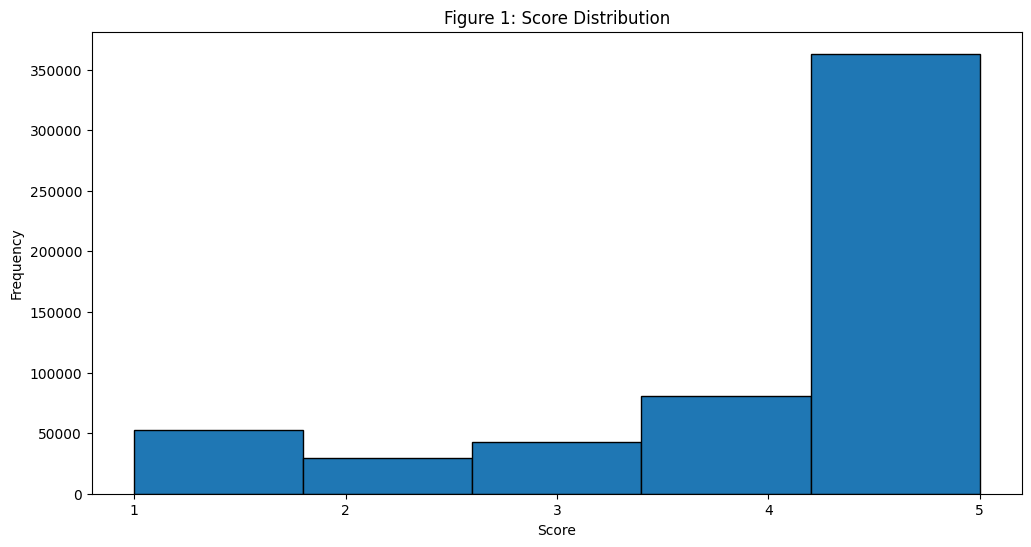

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('Data/Reviews.csv')

# Setting plot size
plt.figure(figsize=(12, 6))

# Plotting the histogram
plt.hist(df['Score'], bins=5, edgecolor='black')

# Set up the labels and axis
plt.title('Figure 1: Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))

# Show the plot
plt.show()

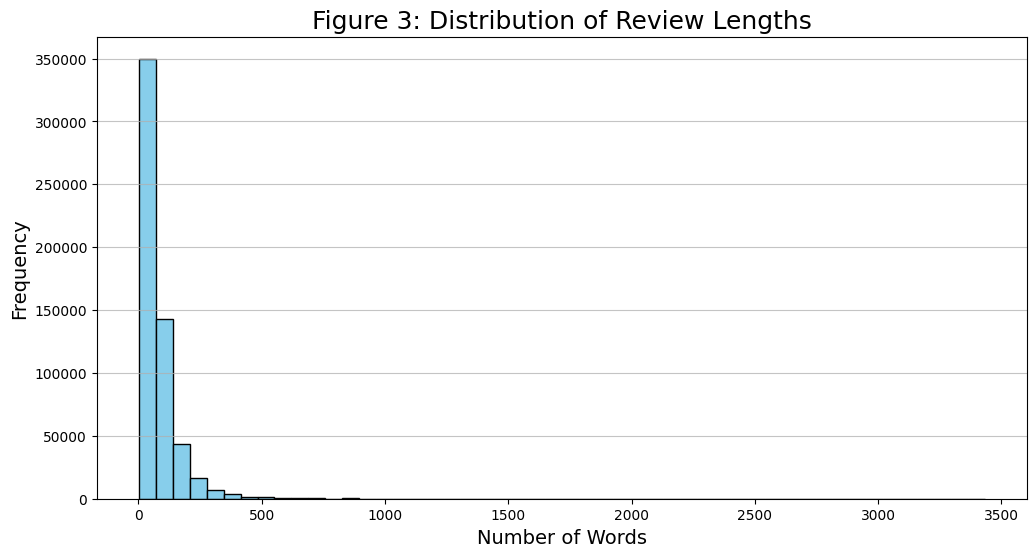

In [4]:
# Calculate the number of words in each review
df['ReviewLength'] = df['Text'].apply(lambda x: len(x.split()))

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the histogram
plt.hist(df['ReviewLength'], bins=50, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Figure 3: Distribution of Review Lengths', fontsize=18)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for easier interpretation
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

In [5]:
# Make a backup of the original dataframe
df_backup = df.copy()

# List of columns to keep
columns_to_keep = ['Text', 'Score']

# Drop all other columns
df_selected = df.drop(columns=[col for col in df.columns if col not in columns_to_keep])

# Display the first few rows to verify
print(df_selected.head())

   Score                                               Text
0      5  I have bought several of the Vitality canned d...
1      1  Product arrived labeled as Jumbo Salted Peanut...
2      4  This is a confection that has been around a fe...
3      2  If you are looking for the secret ingredient i...
4      5  Great taffy at a great price.  There was a wid...


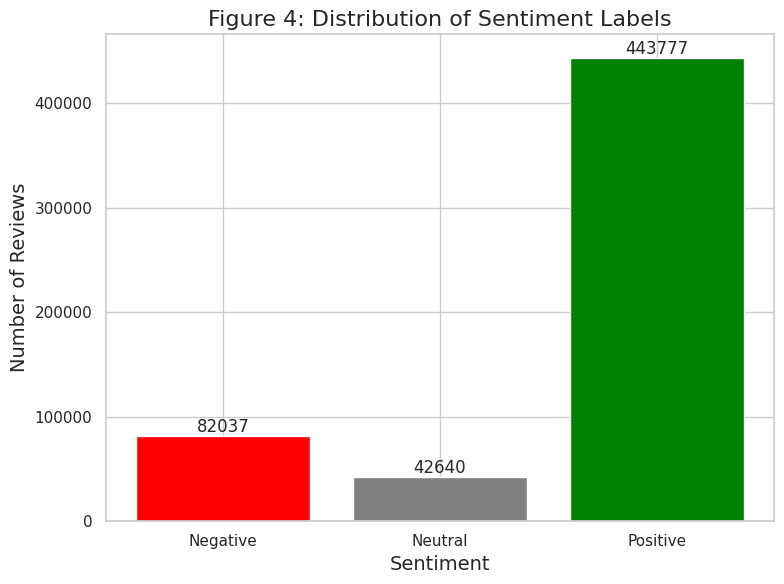

In [6]:
import seaborn as sns

# Function to map 'Score' to 'label' and create a bar chart of label distribution
def plot_sentiment_distribution(df, score_column='Score', label_column='label',title=str):
    """
    Maps the score to sentiment labels, creates the 'label' column, and plots a bar chart of sentiment distribution.

    Parameters:
    df (pd.DataFrame): The input dataset as a pandas DataFrame.
    score_column (str): The name of the column containing the score data.
    label_column (str): The name of the column to store the sentiment label data.

    Returns:
    None: Displays a bar chart showing the distribution of sentiment labels.
    """
    # Set the background of the plot to a white grid
    sns.set(style="whitegrid")

    # Define the mapping from Score to label
    score_to_label = {
        1: 0,  # Negative sentiment
        2: 0,  # Negative sentiment
        3: 1,  # Neutral sentiment
        4: 2,  # Positive sentiment
        5: 2   # Positive sentiment
    }

    # Map 'Score' to 'label' column
    df[label_column] = df[score_column].map(score_to_label)

    # Count the occurrences of each label
    label_counts = df[label_column].value_counts().sort_index()

    # Define label names for better readability
    label_names = ['Negative', 'Neutral', 'Positive']

    # Create the bar chart
    plt.figure(figsize=(8, 6))
    bars = plt.bar(label_names, label_counts, color=['red', 'gray', 'green'])

    # Add titles and labels
    plt.title(title, fontsize=16)
    plt.xlabel('Sentiment', fontsize=14)
    plt.ylabel('Number of Reviews', fontsize=14)

    # Add count labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 5,
                 f'{int(height)}', ha='center', va='bottom', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have a DataFrame named df_selected with a 'Score' column
plot_sentiment_distribution(df_selected, score_column='Score', label_column='label',title='Figure 4: Distribution of Sentiment Labels')


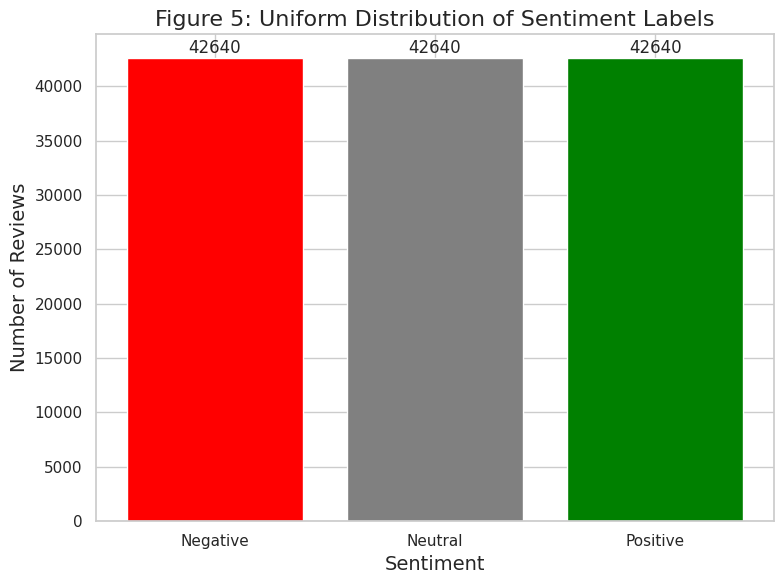

In [7]:
# Define the target number of samples per sentiment
target_count = 42640

# Set a random seed for reproducibility
random_state = 42

# Sample equal number of reviews for each sentiment
df_balanced = df_selected.groupby('label').apply(
    lambda x: x.sample(n=target_count, random_state=random_state)
).reset_index(drop=True)

# Shuffle the balanced DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=random_state).reset_index(drop=True)

# Plot the Sentiment-Distribution
plot_sentiment_distribution(df_balanced, score_column='Score', label_column='label',title='Figure 5: Uniform Distribution of Sentiment Labels')

In [8]:
import re
# Define a function to clean text
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove leading and trailing whitespace
    text = text.strip()
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply the cleaning function to the 'Text' column
df_balanced['Text'] = df_balanced['Text'].apply(clean_text)

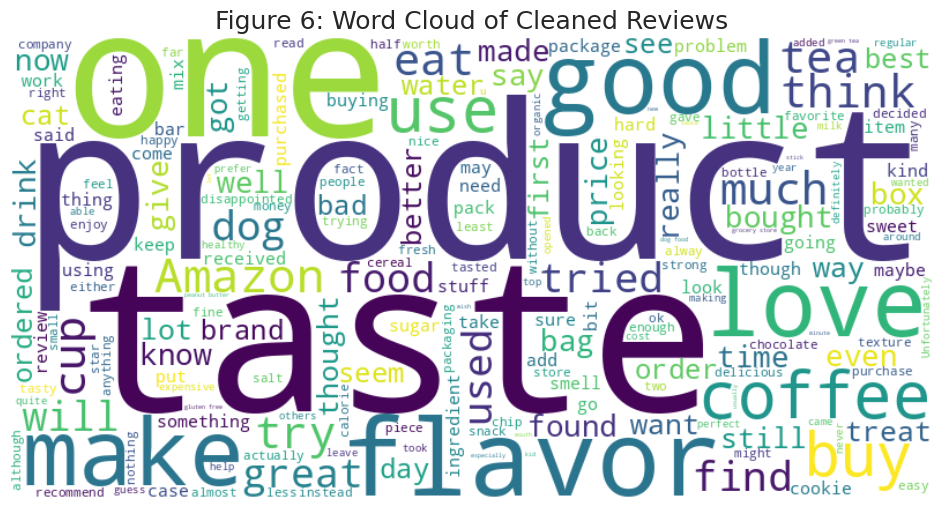

In [9]:
from wordcloud import WordCloud

# Create a word cloud to confirm adjustments of text worked correctly
text = ' '.join(df_balanced['Text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')

# Set up axis and labels
plt.axis('off')
plt.title('Figure 6: Word Cloud of Cleaned Reviews', fontsize = 18)

# Show the plot
plt.show()

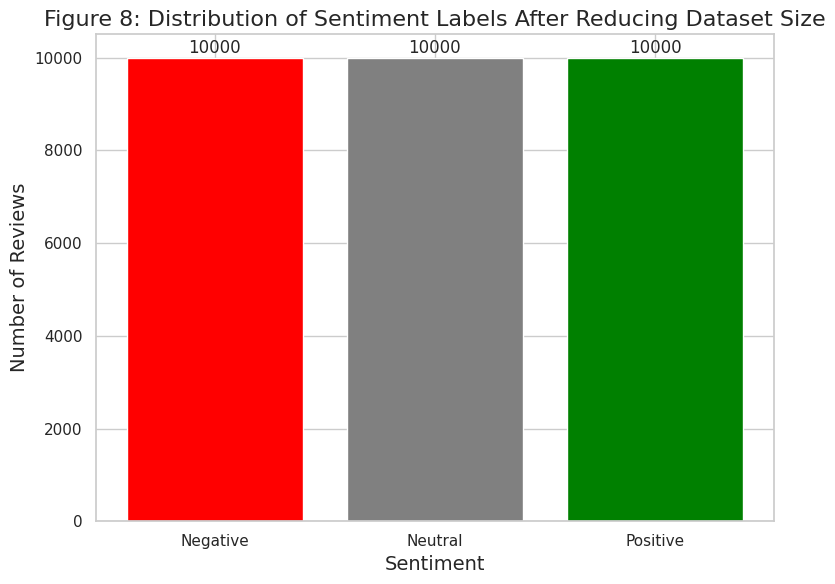

In [10]:
# Back up the full sized cleaned dataset
full_cleaned_df = df_balanced.copy()

experimenting_df = df_balanced.groupby('label').sample(n=10000, random_state=42).reset_index(drop=True)

plot_sentiment_distribution(experimenting_df, score_column='Score', label_column='label',title='Figure 8: Distribution of Sentiment Labels After Reducing Dataset Size')


In [11]:
# Import Libraries

import tensorflow as tf
from transformers import RobertaTokenizer
from sklearn.model_selection import train_test_split

In [12]:
# Define the maximum sequence length based on your data distribution and GPU capacity
max_length = 128  # Adjust as needed; shorter lengths reduce memory usage

# Initialize the tokenizer
tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base')

# Function to clean text (implement your custom cleaning function)
def clean_text(text):
    # Add your text preprocessing steps here
    return text

# Apply text cleaning
experimenting_df['cleaned_text'] = experimenting_df['Text'].apply(clean_text)

# Tokenization function
def tokenize_function(texts):
    return tokenizer(
        texts.tolist(),
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='tf'
    )

# Tokenize the text data
tokenized_texts = tokenize_function(experimenting_df['cleaned_text'])

# Extract input IDs and attention masks
input_ids = tokenized_texts['input_ids'].numpy()
attention_mask = tokenized_texts['attention_mask'].numpy()
labels = experimenting_df['label'].values  # Ensure labels are in NumPy format


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
# Split into train and test sets (15% for testing)
train_input_ids, test_input_ids, train_labels, test_labels, train_attention_mask, test_attention_mask = train_test_split(
    input_ids,
    labels,
    attention_mask,
    test_size=0.15,
    random_state=42,
    stratify=labels
)

# Further split training data into training and validation sets (15% of training data for validation)
train_input_ids, val_input_ids, train_labels, val_labels, train_attention_mask, val_attention_mask = train_test_split(
    train_input_ids,
    train_labels,
    train_attention_mask,
    test_size=0.15,
    random_state=42,
    stratify=train_labels
)



In [14]:
# Define batch size (adjust based on GPU capacity)
batch_size = 16  # Smaller batch sizes reduce memory usage

# Create TensorFlow datasets
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': train_input_ids, 'attention_mask': train_attention_mask},
    train_labels
)).shuffle(buffer_size=10000).batch(batch_size).prefetch(buffer_size=AUTOTUNE)

validation_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': val_input_ids, 'attention_mask': val_attention_mask},
    val_labels
)).batch(batch_size).prefetch(buffer_size=AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': test_input_ids, 'attention_mask': test_attention_mask},
    test_labels
)).batch(batch_size).prefetch(buffer_size=AUTOTUNE)


## Model Freezing
#### No Frozen Layers

In [16]:
model_history = []

In [15]:
# Setting up the model and tokenizer
from transformers import TFRobertaForSequenceClassification

# Load the pre-trained tokenizer and sentiment fine-tuned model
model = TFRobertaForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment', output_hidden_states = True)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/501M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [17]:
# Implement early stopping in order to reduce the training time
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Implement checkpointing to make sure the model saves
checkpoint = tf.keras.callbacks.ModelCheckpoint('no_frozen_layers.keras', save_best_only=True)

In [15]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=5e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
history = model.fit(
    train_dataset,
    epochs=5,  # Start with a small number of epochs
    validation_data=validation_dataset,
    callbacks=[early_stopping, checkpoint]
)
model_history.append(history)

Epoch 1/5
1355/1355 [==============================] - ETA: 0s - loss: 0.8905 - accuracy: 0.5161

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


1355/1355 [==============================] - 644s 456ms/step - loss: 0.8905 - accuracy: 0.5161 - val_loss: 1.0991 - val_accuracy: 0.3339
Epoch 2/5
1355/1355 [==============================] - 618s 456ms/step - loss: 0.7759 - accuracy: 0.6020 - val_loss: 0.6794 - val_accuracy: 0.7391
Epoch 3/5
1355/1355 [==============================] - 619s 457ms/step - loss: 0.4764 - accuracy: 0.8052 - val_loss: 0.5415 - val_accuracy: 0.7885
Epoch 4/5
1355/1355 [==============================] - 619s 457ms/step - loss: 0.3611 - accuracy: 0.8596 - val_loss: 0.5816 - val_accuracy: 0.7699
Epoch 5/5
1355/1355 [==============================] - 612s 451ms/step - loss: 0.2725 - accuracy: 0.8979 - val_loss: 0.6396 - val_accuracy: 0.7888


In [17]:
model.evaluate(test_dataset)

282/282 [==============================] - 42s 147ms/step - loss: 0.5238 - accuracy: 0.7931


[0.5238276720046997, 0.7931110858917236]

### Freezing Layers

In [18]:
# Reload the model
model = TFRobertaForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment', output_hidden_states = True)


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [19]:
# Freeze the first 6 encoder layers
for layer in model.roberta.encoder.layer[:6]:
    layer.trainable = False

# Verify which layers are trainable
for i, layer in enumerate(model.roberta.encoder.layer):
    print(f"Layer {i}: {layer.name} - Trainable: {layer.trainable}")

# Compile the model after freezing layers
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.metrics.SparseCategoricalAccuracy('accuracy')]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Layer 0: layer_._0 - Trainable: False
Layer 1: layer_._1 - Trainable: False
Layer 2: layer_._2 - Trainable: False
Layer 3: layer_._3 - Trainable: False
Layer 4: layer_._4 - Trainable: False
Layer 5: layer_._5 - Trainable: False
Layer 6: layer_._6 - Trainable: True
Layer 7: layer_._7 - Trainable: True
Layer 8: layer_._8 - Trainable: True
Layer 9: layer_._9 - Trainable: True
Layer 10: layer_._10 - Trainable: True
Layer 11: layer_._11 - Trainable: True


In [20]:
# Re-define the checkpoint to be descriptive of this model
checkpoint = tf.keras.callbacks.ModelCheckpoint('first_six_encoder_layer_frozen.keras', save_best_only=True)

In [21]:
# Train this version of the model
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=[early_stopping, checkpoint]
)
model_history.append(history)

Epoch 1/5
1355/1355 [==============================] - 572s 403ms/step - loss: 0.6118 - accuracy: 0.7353 - val_loss: 0.5274 - val_accuracy: 0.7699
Epoch 2/5
1355/1355 [==============================] - 532s 393ms/step - loss: 0.4871 - accuracy: 0.7972 - val_loss: 0.5597 - val_accuracy: 0.7639
Epoch 3/5
1355/1355 [==============================] - 602s 444ms/step - loss: 0.3870 - accuracy: 0.8466 - val_loss: 0.5207 - val_accuracy: 0.7948
Epoch 4/5
1355/1355 [==============================] - 531s 392ms/step - loss: 0.2979 - accuracy: 0.8879 - val_loss: 0.6517 - val_accuracy: 0.7746
Epoch 5/5
1355/1355 [==============================] - 530s 391ms/step - loss: 0.2248 - accuracy: 0.9194 - val_loss: 0.6678 - val_accuracy: 0.8005


In [22]:
# Check model accuracy
model.evaluate(test_dataset)

282/282 [==============================] - 41s 146ms/step - loss: 0.5152 - accuracy: 0.7947


[0.5151806473731995, 0.7946666479110718]

In [23]:
# Reload the model
model = TFRobertaForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment', output_hidden_states = True)

# Freeze the first 9 encoder layers
for layer in model.roberta.encoder.layer[:9]:
    layer.trainable = False

# Verify which layers are trainable
for i, layer in enumerate(model.roberta.encoder.layer):
    print(f"Layer {i}: {layer.name} - Trainable: {layer.trainable}")

# Compile the model after freezing layers
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.metrics.SparseCategoricalAccuracy('accuracy')]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Layer 0: layer_._0 - Trainable: False
Layer 1: layer_._1 - Trainable: False
Layer 2: layer_._2 - Trainable: False
Layer 3: layer_._3 - Trainable: False
Layer 4: layer_._4 - Trainable: False
Layer 5: layer_._5 - Trainable: False
Layer 6: layer_._6 - Trainable: False
Layer 7: layer_._7 - Trainable: False
Layer 8: layer_._8 - Trainable: False
Layer 9: layer_._9 - Trainable: True
Layer 10: layer_._10 - Trainable: True
Layer 11: layer_._11 - Trainable: True


In [24]:
# Re-define the checkpoint to be descriptive of this model
checkpoint = tf.keras.callbacks.ModelCheckpoint('first_9_encoder_layer_frozen.keras', save_best_only=True)

In [25]:
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=[early_stopping, checkpoint]
)
model_history.append(history)

Epoch 1/5
1355/1355 [==============================] - ETA: 0s - loss: 0.6521 - accuracy: 0.7166

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


1355/1355 [==============================] - 591s 422ms/step - loss: 0.6521 - accuracy: 0.7166 - val_loss: 0.6496 - val_accuracy: 0.7396
Epoch 2/5
1355/1355 [==============================] - 557s 411ms/step - loss: 0.5542 - accuracy: 0.7653 - val_loss: 0.5528 - val_accuracy: 0.7673
Epoch 3/5
1355/1355 [==============================] - 498s 368ms/step - loss: 0.4843 - accuracy: 0.7995 - val_loss: 0.5696 - val_accuracy: 0.7642
Epoch 4/5
1355/1355 [==============================] - 505s 373ms/step - loss: 0.4179 - accuracy: 0.8281 - val_loss: 0.5653 - val_accuracy: 0.7775
Epoch 5/5
1355/1355 [==============================] - 497s 367ms/step - loss: 0.3506 - accuracy: 0.8620 - val_loss: 0.6374 - val_accuracy: 0.7799


In [26]:
# Check model accuracy
model.evaluate(test_dataset)

282/282 [==============================] - 41s 147ms/step - loss: 0.5400 - accuracy: 0.7680


[0.5399525761604309, 0.7680000066757202]

In [27]:
# Reload the model
model = TFRobertaForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment', output_hidden_states = True)

# Freeze the first 3 encoder layers
for layer in model.roberta.encoder.layer[:3]:
    layer.trainable = False

# Verify which layers are trainable
for i, layer in enumerate(model.roberta.encoder.layer):
    print(f"Layer {i}: {layer.name} - Trainable: {layer.trainable}")

# Compile the model after freezing layers
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.metrics.SparseCategoricalAccuracy('accuracy')]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Layer 0: layer_._0 - Trainable: False
Layer 1: layer_._1 - Trainable: False
Layer 2: layer_._2 - Trainable: False
Layer 3: layer_._3 - Trainable: True
Layer 4: layer_._4 - Trainable: True
Layer 5: layer_._5 - Trainable: True
Layer 6: layer_._6 - Trainable: True
Layer 7: layer_._7 - Trainable: True
Layer 8: layer_._8 - Trainable: True
Layer 9: layer_._9 - Trainable: True
Layer 10: layer_._10 - Trainable: True
Layer 11: layer_._11 - Trainable: True


In [28]:
# Re-define the checkpoint to be descriptive of this model
checkpoint = tf.keras.callbacks.ModelCheckpoint('first_3_encoder_layer_frozen_7_epochs.keras', save_best_only=True)

In [29]:
history = model.fit(
    train_dataset,
    epochs=7,
    validation_data=validation_dataset,
    callbacks=[early_stopping, checkpoint]
)
model_history.append(history)

Epoch 1/7
1355/1355 [==============================] - 688s 486ms/step - loss: 0.6059 - accuracy: 0.7405 - val_loss: 0.5321 - val_accuracy: 0.7767
Epoch 2/7
1355/1355 [==============================] - 563s 415ms/step - loss: 0.4502 - accuracy: 0.8178 - val_loss: 0.5538 - val_accuracy: 0.7720
Epoch 3/7
1355/1355 [==============================] - 563s 415ms/step - loss: 0.3318 - accuracy: 0.8718 - val_loss: 0.5730 - val_accuracy: 0.7953
Epoch 4/7
1355/1355 [==============================] - 563s 415ms/step - loss: 0.2388 - accuracy: 0.9139 - val_loss: 0.7331 - val_accuracy: 0.7997
Epoch 5/7
1355/1355 [==============================] - 563s 415ms/step - loss: 0.1756 - accuracy: 0.9380 - val_loss: 0.7832 - val_accuracy: 0.7956


In [30]:
# Check model accuracy
model.evaluate(test_dataset)

282/282 [==============================] - 41s 145ms/step - loss: 0.5261 - accuracy: 0.7838


[0.5260788202285767, 0.7837777733802795]

# Testing different learning rates on best freezed layer model

In [18]:
# Define the model
model = TFRobertaForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment', output_hidden_states = True)

# Freeze the first 6 encoder layers
for layer in model.roberta.encoder.layer[:6]:
    layer.trainable = False

# Verify which layers are trainable
for i, layer in enumerate(model.roberta.encoder.layer):
    print(f"Layer {i}: {layer.name} - Trainable: {layer.trainable}")

# Compile the model after freezing layers
optimizer = tf.keras.optimizers.Adam(learning_rate=4e-5) # higher learning rate
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.metrics.SparseCategoricalAccuracy('accuracy')]

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Defining the checkpointing
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'first_6_encoder_layer_frozen_lr_4e-5.keras', save_best_only=True)



All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Layer 0: layer_._0 - Trainable: False
Layer 1: layer_._1 - Trainable: False
Layer 2: layer_._2 - Trainable: False
Layer 3: layer_._3 - Trainable: False
Layer 4: layer_._4 - Trainable: False
Layer 5: layer_._5 - Trainable: False
Layer 6: layer_._6 - Trainable: True
Layer 7: layer_._7 - Trainable: True
Layer 8: layer_._8 - Trainable: True
Layer 9: layer_._9 - Trainable: True
Layer 10: layer_._10 - Trainable: True
Layer 11: layer_._11 - Trainable: True


In [19]:
history = model.fit(
    train_dataset,
    epochs=7,
    validation_data=validation_dataset,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/7
1355/1355 [==============================] - ETA: 0s - loss: 0.6094 - accuracy: 0.7383

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


1355/1355 [==============================] - 588s 410ms/step - loss: 0.6094 - accuracy: 0.7383 - val_loss: 0.5539 - val_accuracy: 0.7569
Epoch 2/7
1355/1355 [==============================] - 547s 403ms/step - loss: 0.4918 - accuracy: 0.7924 - val_loss: 0.5242 - val_accuracy: 0.7809
Epoch 3/7
1355/1355 [==============================] - 541s 399ms/step - loss: 0.3857 - accuracy: 0.8462 - val_loss: 0.5603 - val_accuracy: 0.7935
Epoch 4/7
1355/1355 [==============================] - 533s 393ms/step - loss: 0.2912 - accuracy: 0.8912 - val_loss: 0.6565 - val_accuracy: 0.7916
Epoch 5/7
1355/1355 [==============================] - 533s 394ms/step - loss: 0.2141 - accuracy: 0.9228 - val_loss: 0.6992 - val_accuracy: 0.7895
Epoch 6/7
1355/1355 [==============================] - 534s 394ms/step - loss: 0.1605 - accuracy: 0.9415 - val_loss: 0.7603 - val_accuracy: 0.7880


In [20]:
# Check model accuracy
model.evaluate(test_dataset)

282/282 [==============================] - 41s 146ms/step - loss: 0.5163 - accuracy: 0.7873


[0.5163468718528748, 0.7873333096504211]

In [21]:
# Define the model
model = TFRobertaForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment', output_hidden_states = True)

# Freeze the first 6 encoder layers
for layer in model.roberta.encoder.layer[:6]:
    layer.trainable = False

# Verify which layers are trainable
for i, layer in enumerate(model.roberta.encoder.layer):
    print(f"Layer {i}: {layer.name} - Trainable: {layer.trainable}")

# Compile the model after freezing layers
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5) # higher learning rate
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.metrics.SparseCategoricalAccuracy('accuracy')]

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Defining the checkpointing
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'first_6_encoder_layer_frozen_lr_3e-5.keras', save_best_only=True)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Layer 0: layer_._0 - Trainable: False
Layer 1: layer_._1 - Trainable: False
Layer 2: layer_._2 - Trainable: False
Layer 3: layer_._3 - Trainable: False
Layer 4: layer_._4 - Trainable: False
Layer 5: layer_._5 - Trainable: False
Layer 6: layer_._6 - Trainable: True
Layer 7: layer_._7 - Trainable: True
Layer 8: layer_._8 - Trainable: True
Layer 9: layer_._9 - Trainable: True
Layer 10: layer_._10 - Trainable: True
Layer 11: layer_._11 - Trainable: True


In [22]:
history = model.fit(
    train_dataset,
    epochs=7,
    validation_data=validation_dataset,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/7
1355/1355 [==============================] - ETA: 0s - loss: 0.6062 - accuracy: 0.7367

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


1355/1355 [==============================] - 595s 422ms/step - loss: 0.6062 - accuracy: 0.7367 - val_loss: 0.5276 - val_accuracy: 0.7786
Epoch 2/7
1355/1355 [==============================] - 533s 394ms/step - loss: 0.4869 - accuracy: 0.7972 - val_loss: 0.5305 - val_accuracy: 0.7861
Epoch 3/7
1355/1355 [==============================] - 533s 394ms/step - loss: 0.3920 - accuracy: 0.8442 - val_loss: 0.5518 - val_accuracy: 0.7848
Epoch 4/7
1355/1355 [==============================] - 533s 394ms/step - loss: 0.2934 - accuracy: 0.8868 - val_loss: 0.6230 - val_accuracy: 0.7822
Epoch 5/7
1355/1355 [==============================] - 540s 399ms/step - loss: 0.2064 - accuracy: 0.9254 - val_loss: 0.6680 - val_accuracy: 0.7919


In [23]:
# Check model accuracy
model.evaluate(test_dataset)

282/282 [==============================] - 41s 146ms/step - loss: 0.5245 - accuracy: 0.7833


[0.5245034098625183, 0.7833333611488342]

In [24]:
# Define the model
model = TFRobertaForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment', output_hidden_states = True)

# Freeze the first 6 encoder layers
for layer in model.roberta.encoder.layer[:6]:
    layer.trainable = False

# Verify which layers are trainable
for i, layer in enumerate(model.roberta.encoder.layer):
    print(f"Layer {i}: {layer.name} - Trainable: {layer.trainable}")

# Compile the model after freezing layers
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) # higher learning rate
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.metrics.SparseCategoricalAccuracy('accuracy')]

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Defining the checkpointing
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'first_6_encoder_layer_frozen_lr_2e-5.keras', save_best_only=True)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Layer 0: layer_._0 - Trainable: False
Layer 1: layer_._1 - Trainable: False
Layer 2: layer_._2 - Trainable: False
Layer 3: layer_._3 - Trainable: False
Layer 4: layer_._4 - Trainable: False
Layer 5: layer_._5 - Trainable: False
Layer 6: layer_._6 - Trainable: True
Layer 7: layer_._7 - Trainable: True
Layer 8: layer_._8 - Trainable: True
Layer 9: layer_._9 - Trainable: True
Layer 10: layer_._10 - Trainable: True
Layer 11: layer_._11 - Trainable: True


In [25]:
history = model.fit(
    train_dataset,
    epochs=7,
    validation_data=validation_dataset,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/7
1355/1355 [==============================] - 610s 432ms/step - loss: 0.6018 - accuracy: 0.7387 - val_loss: 0.5778 - val_accuracy: 0.7694
Epoch 2/7
1355/1355 [==============================] - 614s 453ms/step - loss: 0.4987 - accuracy: 0.7906 - val_loss: 0.5151 - val_accuracy: 0.7843
Epoch 3/7
1355/1355 [==============================] - 534s 394ms/step - loss: 0.4088 - accuracy: 0.8351 - val_loss: 0.5454 - val_accuracy: 0.7864
Epoch 4/7
1355/1355 [==============================] - 534s 394ms/step - loss: 0.3139 - accuracy: 0.8782 - val_loss: 0.5823 - val_accuracy: 0.7990
Epoch 5/7
1355/1355 [==============================] - 534s 394ms/step - loss: 0.2369 - accuracy: 0.9109 - val_loss: 0.6280 - val_accuracy: 0.7885
Epoch 6/7
1355/1355 [==============================] - 541s 399ms/step - loss: 0.1678 - accuracy: 0.9382 - val_loss: 0.7286 - val_accuracy: 0.7888


In [26]:
# Check model accuracy
model.evaluate(test_dataset)

282/282 [==============================] - 41s 147ms/step - loss: 0.5104 - accuracy: 0.7860


[0.5103716850280762, 0.7860000133514404]